# Problem setup
Let's consider event selection in N-dimensional space. Background events are uniformly distributed in a cube with side of 2a, centered in the centre of the coordinate frame. Signal events are uniformly distributed inside a sphere of radius R, also centered in the centre of the
coordinate frame. We assume R ≤ a, i.e. sphere is inside the cube.

• what is the optimal approach to select signal enreached sample in this problem?

• calculate (the analytical formula for) the ROC function for this problem. What is the best value for the selection cut?

• generate required data sets and train one of the sklearn (or other library) machine-learning algorithms to discriminate between signal and background events for N = 4, a = 1 and R = 0.8. Compare the obtaioned ROC curve with your analytical result. Comment on the possible discrepancies.

# Plotting analytical solution for N = 4, a = 1, R = 0.8

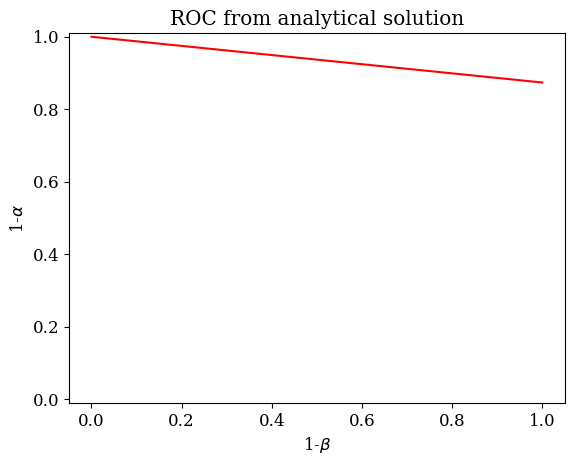

In [51]:
from matplotlib import pyplot as plt
from matplotlib import rcParams

rcParams['font.size'] = 12 
rcParams['font.family'] = 'serif'

import math

def one_minus_beta(r_cut, n):
    return (r_cut / R)**n

def one_minus_alpha(r_cut, n):
    return 1 - (1/math.gamma(n/2 + 1))*np.pi**(n/2)*r_cut**n/(2*a)**n

r = np.linspace(0, R, 100)

plt.figure()
plt.plot(one_minus_beta(r,4), one_minus_alpha(r,4), color = "r")
plt.xlabel(r"1-$\beta$")
plt.ylabel(r"1-$\alpha$")
plt.ylim(-0.01,1.01)
plt.title("ROC from analytical solution")
plt.show()

# Generating training dataset

In [5]:
import numpy as np

a = 1
R = 0.8
N = 1000

background_train = []
for i in range(N):
    background_train.append(np.random.uniform(low = -a, high = a, size = 4))
background_train = np.array(background_train)

signal_train = []

while len(signal_train) < N:
    point = np.random.uniform(low = -R, high = R, size = 4)
    dist = np.sqrt(point[0]**2 + point[1]**2 + point[2]**2 + point[3]**2)
    if dist <= R:
        signal_train.append(point)

signal_train = np.array(signal_train)

x_train = np.vstack((signal_train, background_train))
y_train = np.hstack((np.ones(N), np.zeros(N)))

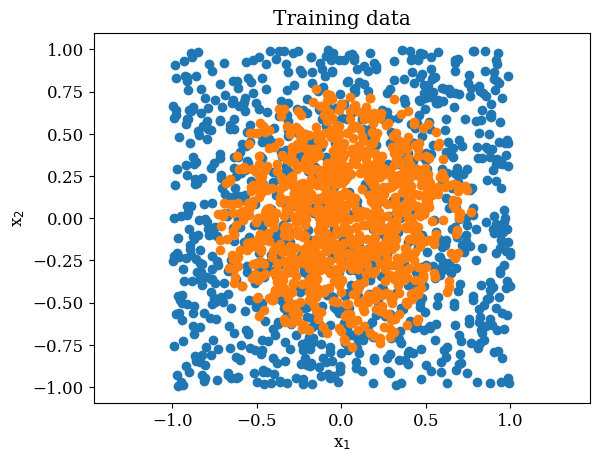

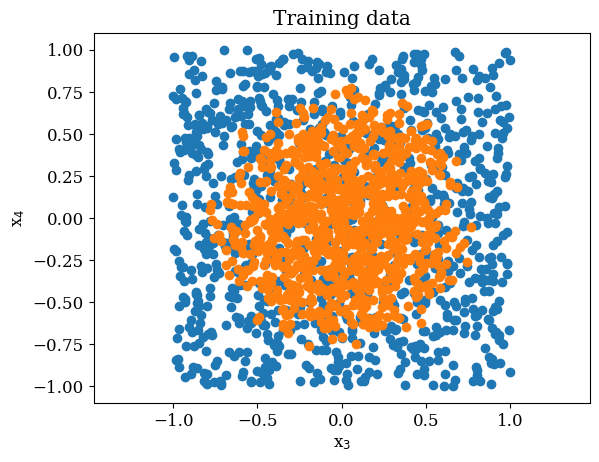

In [48]:
x1_back = background_train[:,0]
x2_back = background_train[:,1]
x1_signal = signal_train[:,0]
x2_signal = signal_train[:,1]

plt.figure()
plt.scatter(x1_back, x2_back)
plt.scatter(x1_signal, x2_signal)
plt.axis("equal")
plt.xlabel(r"x$_{1}$")
plt.ylabel(r"x$_{2}$")
plt.title("Training data")
plt.show()

x3_back = background_train[:,2]
x4_back = background_train[:,3]
x3_signal = signal_train[:,2]
x4_signal = signal_train[:,3]

plt.figure()
plt.scatter(x3_back, x4_back)
plt.scatter(x3_signal, x4_signal)
plt.axis("equal")
plt.xlabel(r"x$_{3}$")
plt.ylabel(r"x$_{4}$")
plt.title("Training data")
plt.show()

# Generating testing dataset

In [9]:
background_test = []
for i in range(N):
    background_test.append(np.random.uniform(low = -a, high = a, size = 4))
background_test = np.array(background_test)

signal_test = []

while len(signal_test) < N:
    point = np.random.uniform(low = -R, high = R, size = 4)
    dist = np.sqrt(point[0]**2 + point[1]**2 + point[2]**2 + point[3]**2)
    if dist <= R:
        signal_test.append(point)

signal_test = np.array(signal_test)

x_test = np.vstack((signal_test, background_test))
y_test = np.hstack((np.ones(N), np.zeros(N)))

For the machine learining, RandomForestClassifier was used.

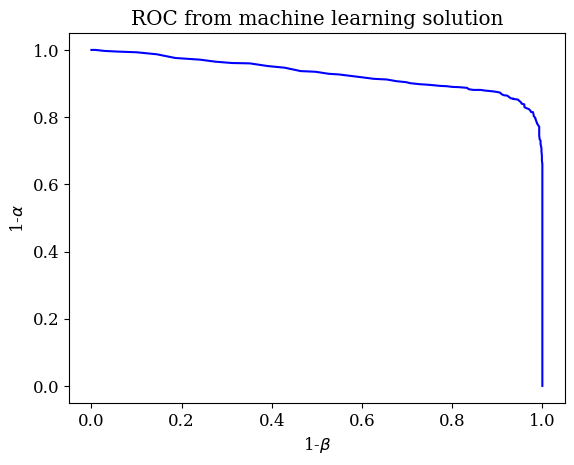

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)
y_scores = clf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)

plt.figure()
plt.plot(tpr, 1-fpr, color = "b")
plt.xlabel(r"1-$\beta$")
plt.ylabel(r"1-$\alpha$")
plt.title("ROC from machine learning solution")
plt.show()

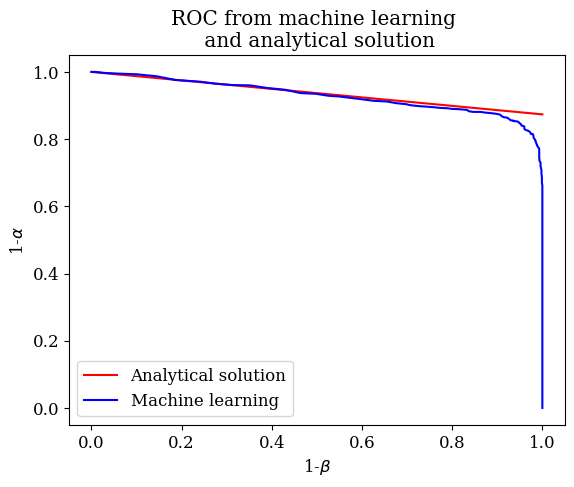

In [50]:
plt.figure()
plt.plot(one_minus_beta(r,4), one_minus_alpha(r,4), color = "r", label = "Analytical solution")
plt.plot(tpr, 1-fpr, color = "b", label = "Machine learning")
plt.xlabel(r"1-$\beta$")
plt.ylabel(r"1-$\alpha$")
plt.title("ROC from machine learning \n and analytical solution")
plt.legend()
plt.show()

The visible discrepancy between the result from the ML and the analytical solutions around $1-\beta \approx 1$ may be due to the fact that in this region $r_{cut} \approx R$ and the Random Forest model cannot perform cuts that are radially symmetrical. It means that some background may potentially be accepted for these $r_{cut}$'s. Because of that, $1-\alpha$ (background rejection) is lower in comparison with the analytical solution for $r_{cut} \approx R$.